In [1]:
library(ggplot2)
library(dplyr)
library(gplots)
library(pvclust)
library(reshape2)
library(umap)
library(ggExtra) 
library(pals)
library(RColorBrewer)
library(ComplexHeatmap)
library(circlize)
library(heatmap.plus)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessage

In [2]:
casted_MAF_VarBySample4 <- read.csv("./7614_RevisionD-T.csv", header=T, sep="," ,row.names=1)
casted_MAF_VarBySample4<-casted_MAF_VarBySample4[!(casted_MAF_VarBySample4$Cell_Type %in% c('DLX1','D-T')),]

In [3]:
Normalized_casted_MAF_VarBySample2<-t(na.omit(t(casted_MAF_VarBySample4[,-1:-4])))

In [4]:
myCol<-as.data.frame(t(na.omit(t(casted_MAF_VarBySample4[,1:4]))))
myCol$Hemisphere_col[myCol$Hemisphere %in% c("R")]<-"Red"
myCol$Hemisphere_col[myCol$Hemisphere %in% c("L")]<-"Blue"
myCol$Region_col[myCol$Region %in% c("PF")]<-"#00998F"
myCol$Region_col[myCol$Region %in% c("F")]<-"#0075DC"
myCol$Region_col[myCol$Region %in% c("Ins")]<-"#993F00"
#myCol$Region_col[myCol$Region %in% c("PF")]<-"#00998F"
myCol$Region_col[myCol$Region %in% c("O")]<-"#FF5005"
myCol$Region_col[myCol$Region %in% c("P")]<-"#FFE100"
myCol$Region_col[myCol$Region %in% c("T")]<-"#2BCE48"
#myCol$Cell_Type[myCol$Cell_Type %in% c("DLX1")]<-"#F06666"
myCol$Cell_Type[myCol$Cell_Type %in% c("COUPTF2")]<-"#5FBEEB"
myCol$Cell_Type[myCol$Cell_Type %in% c("TBR1")]<-"#7BBE42"
myCol$Cell_Type[myCol$Cell_Type %in% c("Cont-CT")]<-"black"

myCol2<-as.matrix(cbind(myCol$Hemisphere_col,myCol$Cell_Type,myCol$Region_col))
colnames(myCol2)<-c("Hemisphere","Cell_Type","Region")

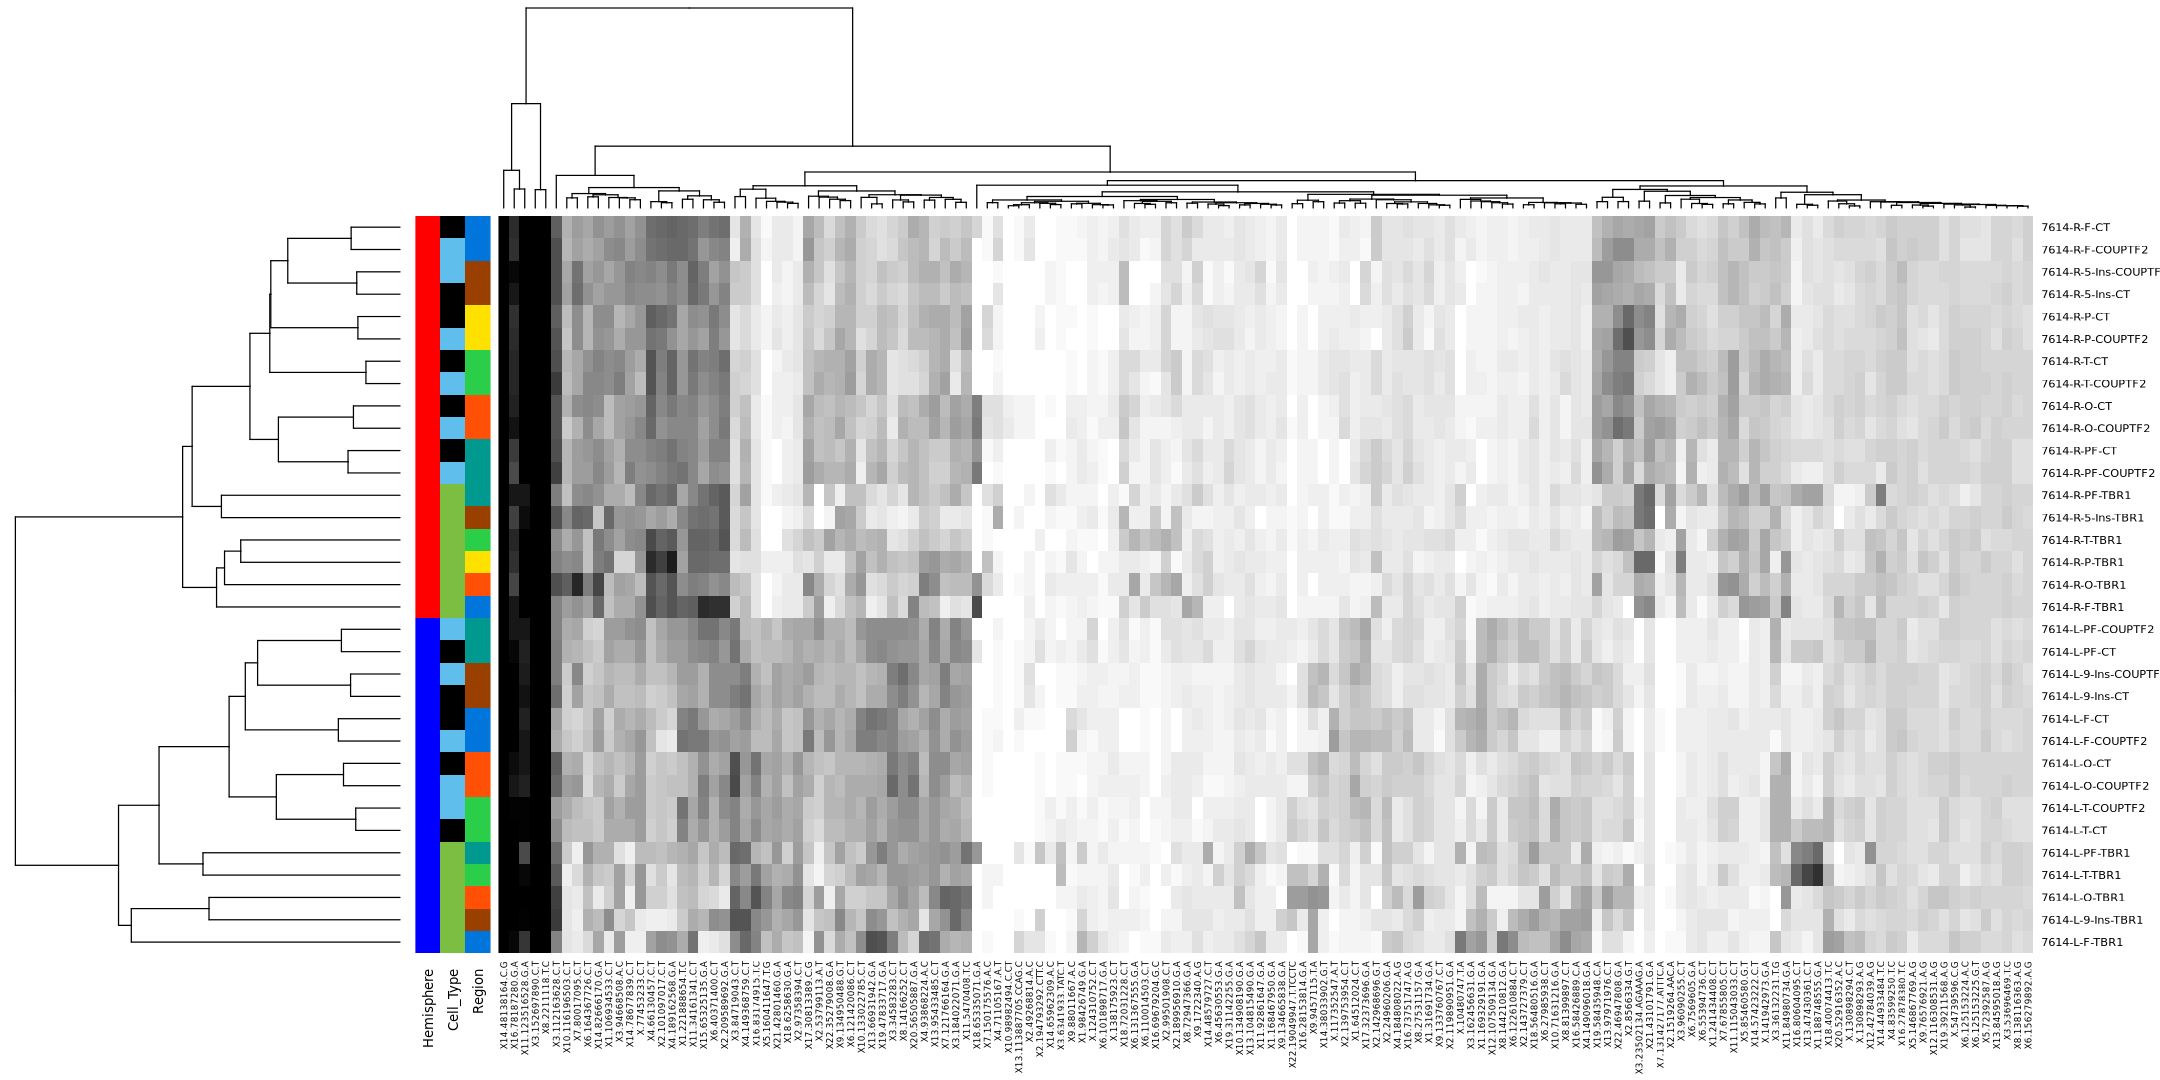

In [7]:
options(repr.plot.width=18, repr.plot.height=9)
# Colors = c("blue4","white","red4")
Colors = c("white","black","black")
Colors = colorRampPalette(Colors)(100)
heatmap.plus(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))

In [8]:
pdf(file="7614_convolved_Cont-CT_heatmap.pdf",height=9,width=18)
options(repr.plot.width=18, repr.plot.height=9)
# Colors = c("blue4","white","red4")
Colors = c("white","black","black")
Colors = colorRampPalette(Colors)(100)
heatmap.plus(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))
dev.off()                   

png 
  2

In [9]:
pdf(file="7614_convolved_Cont-CT_heatmap_scalebar.pdf",height=9,width=18)
options(repr.plot.width=18, repr.plot.height=9)
Colors = c("white","Black","Black")
Colors = colorRampPalette(Colors)(100)
heatmap.2(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             #RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))
dev.off()    

png 
  2

In [16]:
casted_MAF_VarBySample4 <- read.csv("./7614_RevisionD-T.csv", header=T, sep="," ,row.names=1)
casted_MAF_VarBySample4<-casted_MAF_VarBySample4[!(casted_MAF_VarBySample4$Cell_Type %in% c('DLX1','Cont-CT')),]

In [17]:
Normalized_casted_MAF_VarBySample2<-t(na.omit(t(casted_MAF_VarBySample4[,-1:-4])))

In [18]:
myCol<-as.data.frame(t(na.omit(t(casted_MAF_VarBySample4[,1:4]))))
myCol$Hemisphere_col[myCol$Hemisphere %in% c("R")]<-"Red"
myCol$Hemisphere_col[myCol$Hemisphere %in% c("L")]<-"Blue"
myCol$Region_col[myCol$Region %in% c("PF")]<-"#00998F"
myCol$Region_col[myCol$Region %in% c("F")]<-"#0075DC"
myCol$Region_col[myCol$Region %in% c("Ins")]<-"#993F00"
#myCol$Region_col[myCol$Region %in% c("PF")]<-"#00998F"
myCol$Region_col[myCol$Region %in% c("O")]<-"#FF5005"
myCol$Region_col[myCol$Region %in% c("P")]<-"#FFE100"
myCol$Region_col[myCol$Region %in% c("T")]<-"#2BCE48"

#myCol$Cell_Type[myCol$Cell_Type %in% c("DLX1")]<-"#F06666"
myCol$Cell_Type[myCol$Cell_Type %in% c("COUPTF2")]<-"#5FBEEB"
myCol$Cell_Type[myCol$Cell_Type %in% c("TBR1")]<-"#7BBE42"
#myCol$Cell_Type[myCol$Cell_Type %in% c("Cont-CT")]<-"black"
myCol$Cell_Type[myCol$Cell_Type %in% c("D-T")]<-"grey"

myCol2<-as.matrix(cbind(myCol$Hemisphere_col,myCol$Cell_Type,myCol$Region_col))
colnames(myCol2)<-c("Hemisphere","Cell_Type","Region")

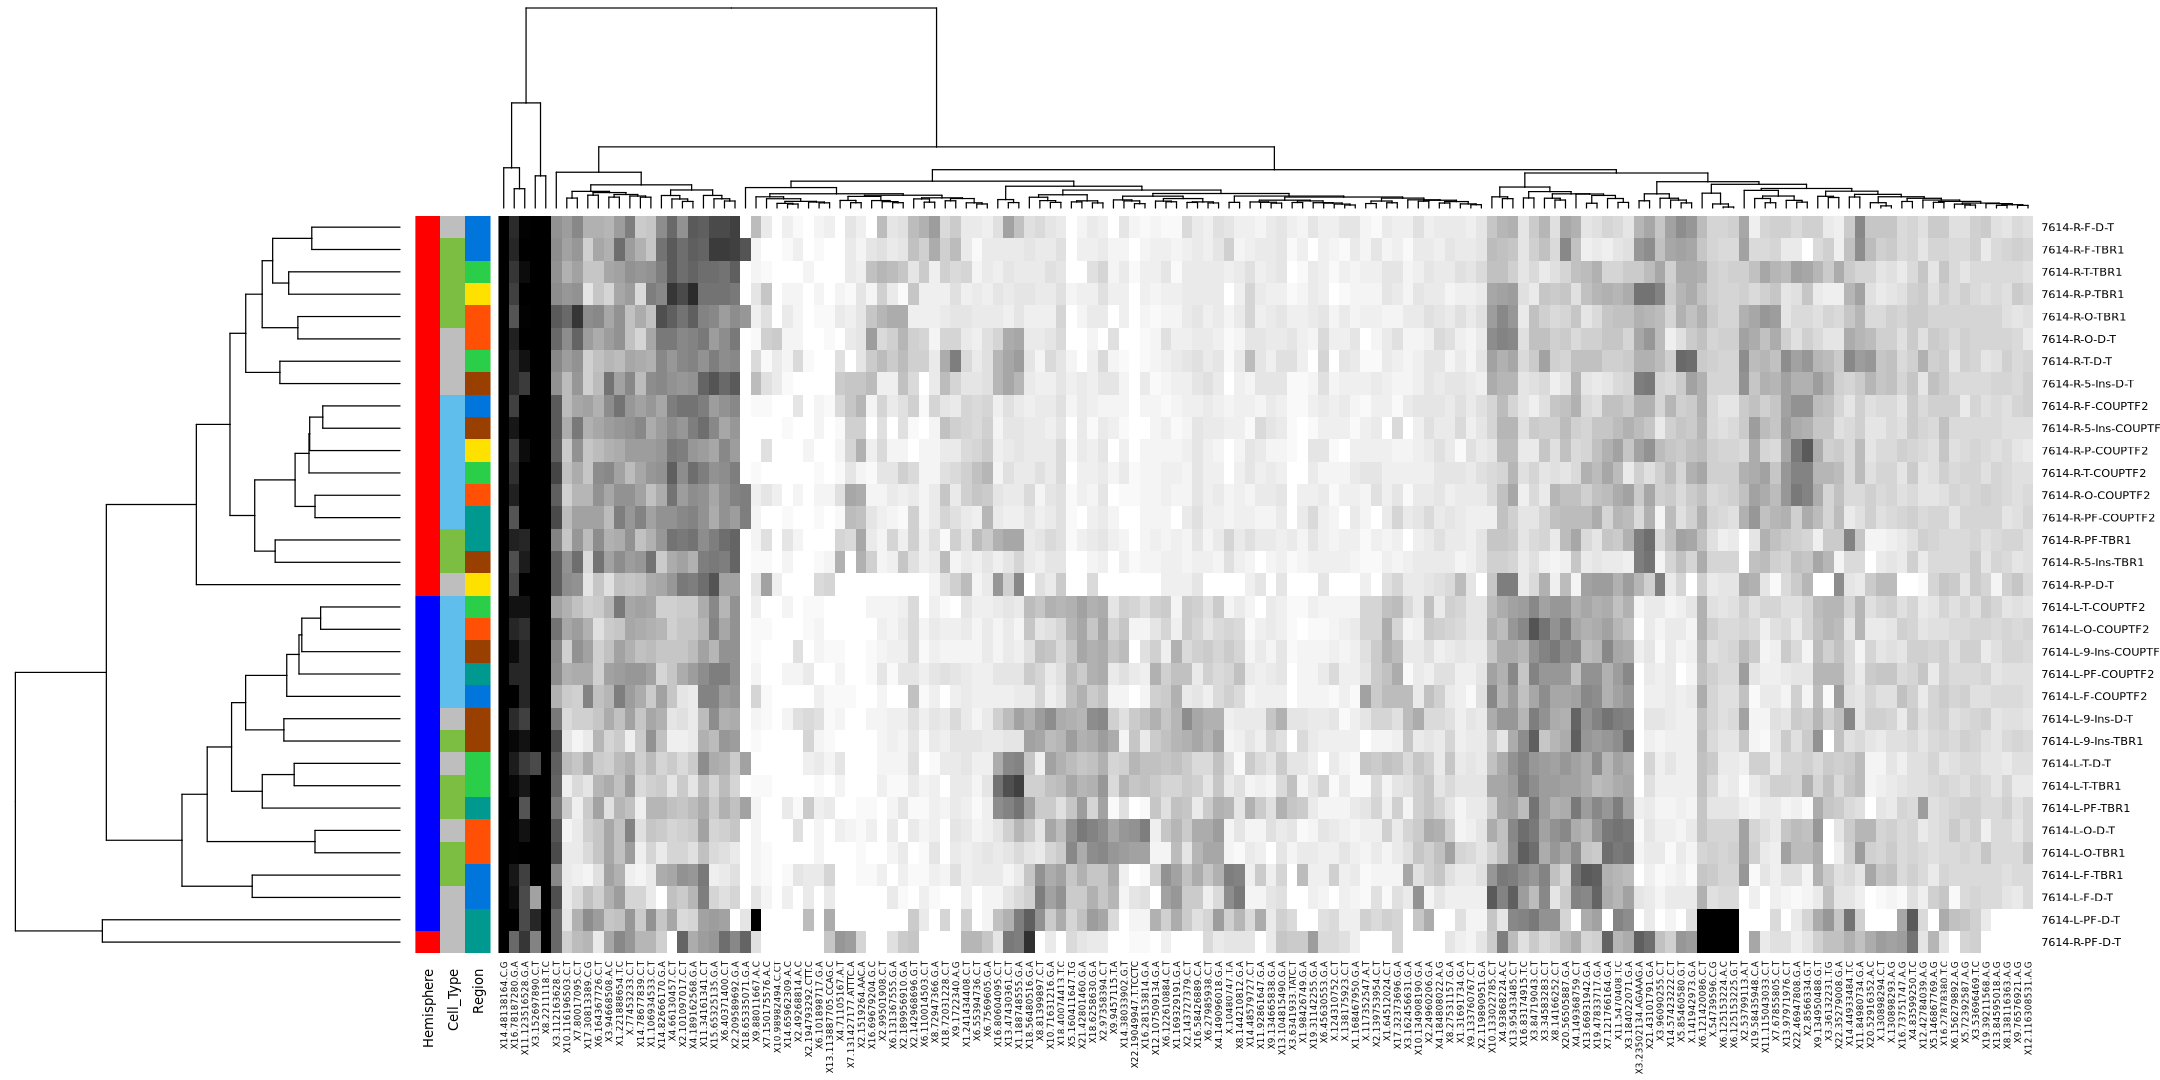

In [19]:
options(repr.plot.width=18, repr.plot.height=9)
# Colors = c("blue4","white","red4")
Colors = c("white","black","black")
Colors = colorRampPalette(Colors)(100)
heatmap.plus(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))

In [20]:
pdf(file="7614_deconvolved_DLX1_heatmap.pdf",height=9,width=18)
options(repr.plot.width=18, repr.plot.height=9)
# Colors = c("blue4","white","red4")
Colors = c("white","black","black")
Colors = colorRampPalette(Colors)(100)
heatmap.plus(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))
dev.off()               

png 
  2

In [21]:
pdf(file="7614_deconvolved_DLX1_heatmap_scalebar.pdf",height=9,width=18)
options(repr.plot.width=18, repr.plot.height=9)
Colors = c("white","Black","Black")
Colors = colorRampPalette(Colors)(100)
heatmap.2(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             #RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))
dev.off()    

png 
  2